# Visualisation

This notebook is used for visualisation of the data distributions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pylab as plt
import matplotlib.mlab as mlab

from sklearn.model_selection import train_test_split
from operate_datasets import load_dataset, split_dataset

DATASET_PATH = "~/snd_data/new_dataset/"

Welcome to JupyROOT 6.18/00


# Full sum dataset

In [2]:
full_X, full_y = load_dataset(DATASET_PATH, 'sum')

X_train, y_train, _, _ = split_dataset(full_X, full_y, 0.9)

In [3]:
min_clip = 25

## Neutrinos distribution

In [5]:
full_y.shape

(120000,)

In [6]:
nu_1 = full_y[     :40000]
nu_2 = full_y[40000:80000]
nu_3 = full_y[80000:120000]

In [7]:
import scipy.stats as stats
# distributions
# https://docs.scipy.org/doc/scipy/reference/stats.html

def plot_prior_distro(data):
    n, bins, patches = plt.hist(data, bins=100, density=True, label='data')

    (K, loc, scale) = stats.exponnorm.fit(data)
    x = np.linspace(0.0, 1.2, 300)
    plt.plot(x, stats.exponnorm.pdf(x, K, loc, scale), label='exp modified normal')
    
    plt.xlabel(r'$E_{true}$')
    plt.ylabel(r'$\rho$ (density)')
    plt.legend()
    plt.show()

Full data


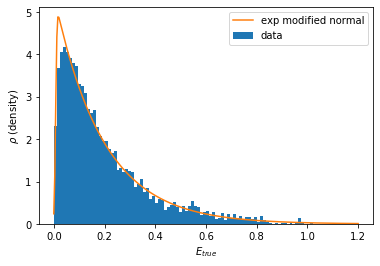

In [8]:
print('Full data')
plot_prior_distro(full_y)

nuel


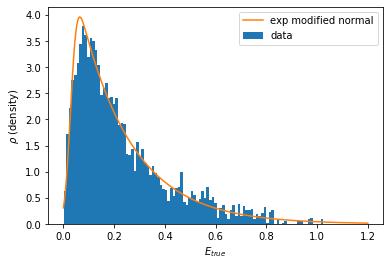

In [9]:
print('nuel')
plot_prior_distro(nu_1)

numu


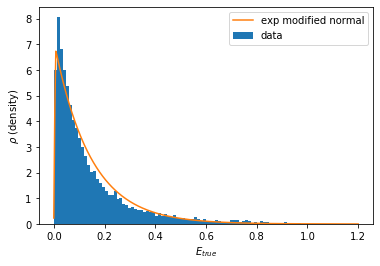

In [10]:
print('numu')
plot_prior_distro(nu_2)

nutau


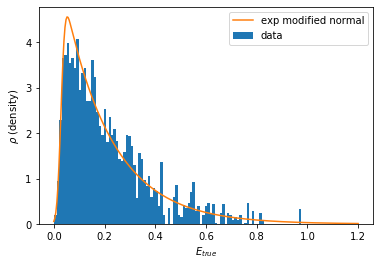

In [11]:
print('nutau')
plot_prior_distro(nu_3)

## 1d histograms

Pixel sums in (x,y) representation



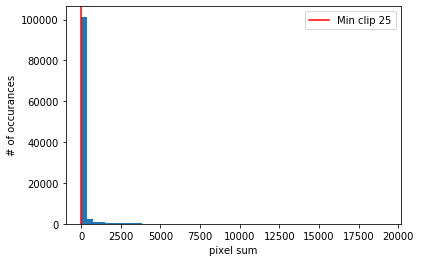

In [12]:
#clip_size = np.where(X_train <= min_clip)[0].shape[0]
#print('Cuts', clip_size / train_size * 100., '% of the dataset')

print("Pixel sums in (x,y) representation\n")
plt.hist(X_train, bins=50)

plt.axvline(x=min_clip, c='r', label='Min clip ' + str(min_clip))

plt.xlabel('pixel sum')
plt.ylabel('# of occurances')
plt.legend()
plt.show()

Normalised true energies



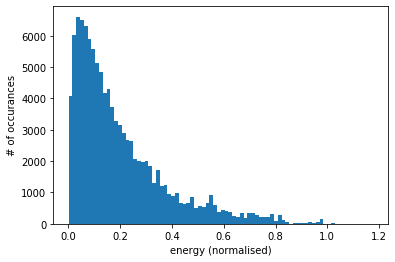

In [13]:
print("Normalised true energies\n")
plt.hist(y_train, bins=80)
plt.xlabel('energy (normalised)')
plt.ylabel('# of occurances')
plt.show()

Pixel sums in (x,y) representation



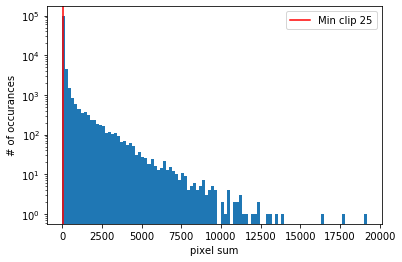

In [14]:
print("Pixel sums in (x,y) representation\n")
plt.hist(X_train, bins=100, log=True)

plt.axvline(x=min_clip, c='r', label='Min clip ' + str(min_clip))

plt.xlabel('pixel sum')
plt.ylabel('# of occurances')
plt.legend()
plt.show()

Normalised true energies



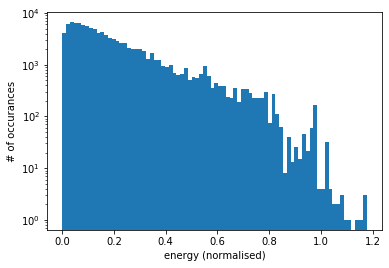

In [15]:
print("Normalised true energies\n")
plt.hist(y_train, bins=80, log=True)
plt.xlabel('energy (normalised)')
plt.ylabel('# of occurances')
plt.show()

## 2d histograms

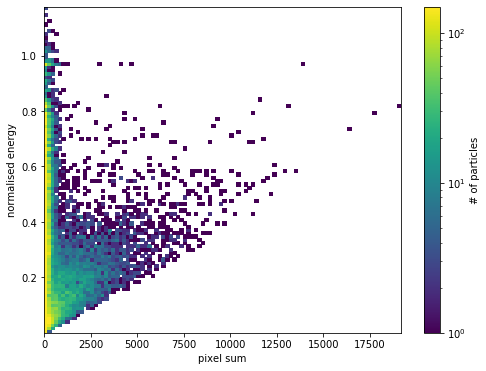

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

hist = ax.hist2d(full_X, full_y, 
                 bins=100, 
                 norm=mpl.colors.LogNorm(), 
                 vmax=150)

plt.xlabel('pixel sum')
plt.ylabel('normalised energy')

cbar = fig.colorbar(hist[3], ax=ax)
cbar.set_label('# of particles')

plt.show()

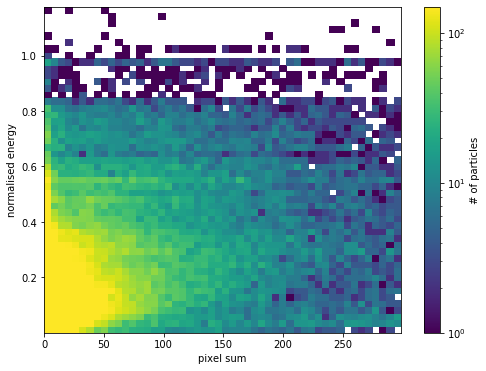

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

idx = np.where(full_X < 300)

hist = ax.hist2d(full_X[idx], 
                 full_y[idx], 
                 bins=(50,50), 
                 norm=mpl.colors.LogNorm(), 
                 vmax=150)

plt.xlabel('pixel sum')
plt.ylabel('normalised energy')

cbar = fig.colorbar(hist[3], ax=ax)
cbar.set_label('# of particles')

plt.show()

# Longitudal dataset

In [18]:
full_X, full_y = load_dataset(DATASET_PATH, 'longitudal')

X_train, y_train, _, _ = split_dataset(full_X, full_y, 0.9)

In [48]:
scifi_planes_num = 5
mu_up_planes_num = 5
mu_down_planes_num = 3

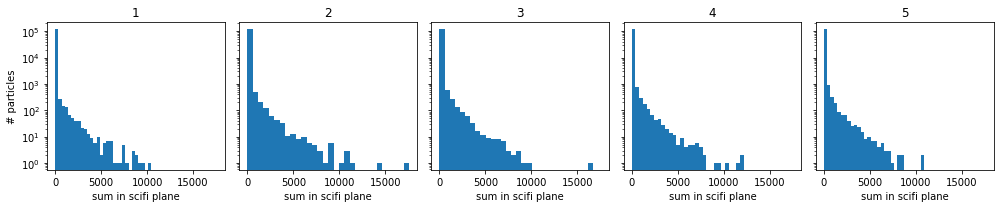

In [53]:
fig, axs = plt.subplots(1, scifi_planes_num, sharex=True, sharey=True, figsize=(14,3))

for i in range(scifi_planes_num):
    axs[i].set_title(str(i+1))
    axs[i].hist(full_X[:,i], log=True, bins=30)
    axs[i].set_xlabel('sum in scifi plane')

axs[0].set_ylabel('# particles')

plt.tight_layout()
plt.show()

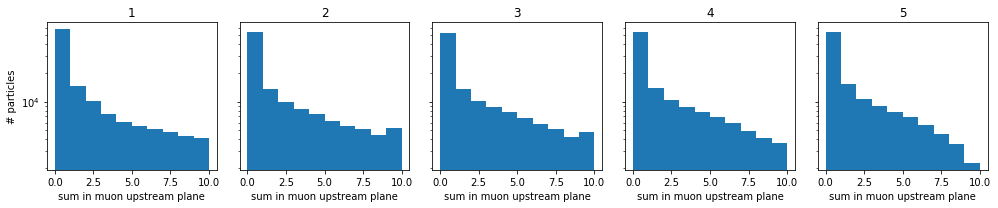

In [83]:
fig, axs = plt.subplots(1, mu_up_planes_num, sharex=True, sharey=True, figsize=(14,3))

for i in range(mu_up_planes_num):
    axs[i].set_title(str(i+1))
    axs[i].hist(full_X[:,scifi_planes_num + i], log=True, bins=10)
    axs[i].set_xlabel('sum in muon upstream plane')

axs[0].set_ylabel('# particles')

plt.tight_layout()
plt.show()

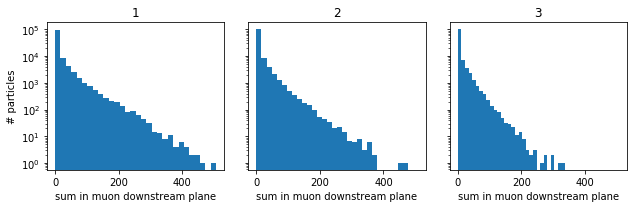

In [51]:
fig, axs = plt.subplots(1, mu_down_planes_num, sharex=True, sharey=True, figsize=(9,3))

for i in range(mu_down_planes_num):
    axs[i].set_title(str(i+1))
    axs[i].hist(full_X[:,scifi_planes_num + mu_up_planes_num + i], log=True, bins=30)
    axs[i].set_xlabel('sum in muon downstream plane')

axs[0].set_ylabel('# particles')

plt.tight_layout()
plt.show()

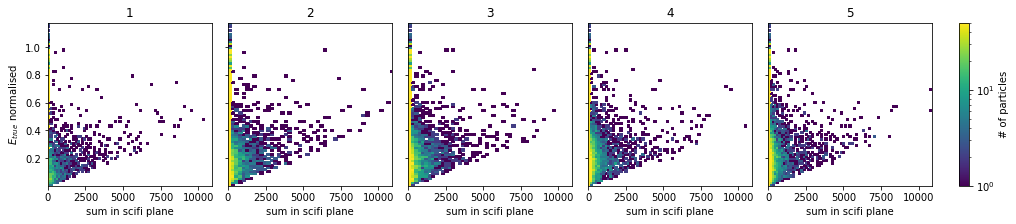

In [54]:
fig, axs = plt.subplots(1, scifi_planes_num, 
                        sharex=True, sharey=True, 
                        figsize=(14,3), constrained_layout=True)

for i in range(scifi_planes_num):
    axs[i].set_title(str(i+1))
    hist = axs[i].hist2d(full_X[:,i], full_y, 
                       bins=75, 
                       norm=mpl.colors.LogNorm(), 
                       vmax=50)
    
    axs[i].set_xlabel('sum in scifi plane')

cbar = fig.colorbar(hist[3], ax=axs, aspect=75)
cbar.set_label('# of particles')

axs[0].set_ylabel(r'$E_{true}$ normalised')

plt.show()

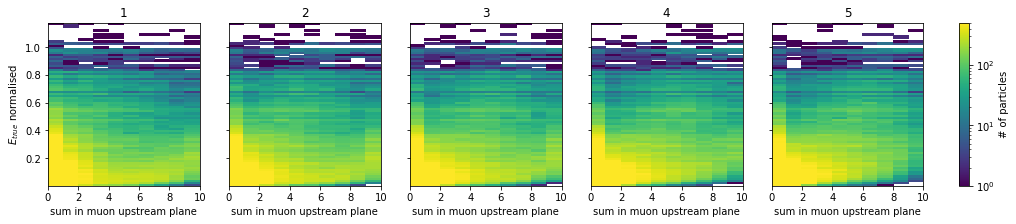

In [82]:
fig, axs = plt.subplots(1, mu_up_planes_num, 
                        sharex=True, sharey=True, 
                        figsize=(14,3), constrained_layout=True)

for i in range(mu_up_planes_num):
    axs[i].set_title(str(i+1))
    hist = axs[i].hist2d(full_X[:,scifi_planes_num + i], full_y, 
                       bins=(10,75), 
                       norm=mpl.colors.LogNorm(), 
                       vmax=500)
    
    axs[i].set_xlabel('sum in muon upstream plane')

cbar = fig.colorbar(hist[3], ax=axs, aspect=75)
cbar.set_label('# of particles')

axs[0].set_ylabel(r'$E_{true}$ normalised')

plt.show()

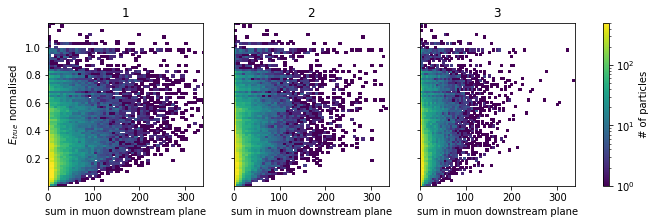

In [60]:
fig, axs = plt.subplots(1, mu_down_planes_num, 
                        sharex=True, sharey=True, 
                        figsize=(9,3), constrained_layout=True)

for i in range(mu_down_planes_num):
    axs[i].set_title(str(i+1))
    hist = axs[i].hist2d(full_X[:,scifi_planes_num + mu_up_planes_num + i], full_y, 
                       bins=75, 
                       norm=mpl.colors.LogNorm(), 
                       vmax=500)
    
    axs[i].set_xlabel('sum in muon downstream plane')

cbar = fig.colorbar(hist[3], ax=axs, aspect=75)
cbar.set_label('# of particles')

axs[0].set_ylabel(r'$E_{true}$ normalised')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

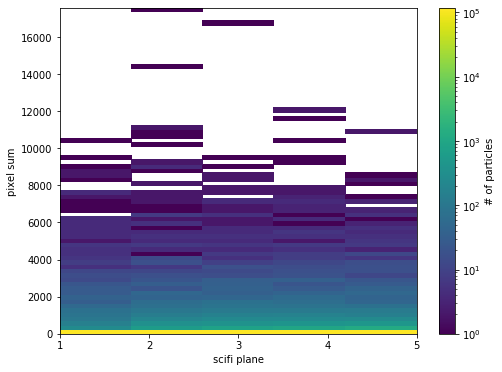

In [77]:
fig, ax = plt.subplots(figsize=(8,6))

planes_arr = np.zeros((full_X.shape[0], scifi_planes_num))

for i in range(scifi_planes_num):
    planes_arr[:,i] = i + 1

hist = ax.hist2d(planes_arr.flatten(), full_X[:,:scifi_planes_num].flatten(), 
                 norm=mpl.colors.LogNorm(), bins=(scifi_planes_num, 75))

plt.xlabel('scifi plane')
plt.ylabel('pixel sum')
plt.xticks(np.arange(1,scifi_planes_num + 1))

cbar = fig.colorbar(hist[3], ax=ax)
cbar.set_label('# of particles')
    
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

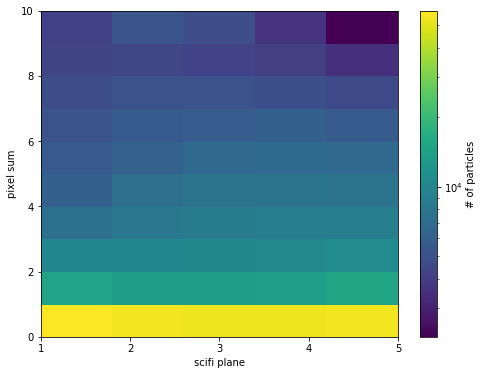

In [78]:
fig, ax = plt.subplots(figsize=(8,6))

planes_arr = np.zeros((full_X.shape[0], mu_up_planes_num))

for i in range(mu_up_planes_num):
    planes_arr[:,i] = i + 1

hist = ax.hist2d(planes_arr.flatten(), full_X[:,scifi_planes_num:scifi_planes_num + mu_up_planes_num].flatten(), 
                 norm=mpl.colors.LogNorm(), bins=(mu_up_planes_num, 10))

plt.xlabel('scifi plane')
plt.ylabel('pixel sum')
plt.xticks(np.arange(1,mu_up_planes_num + 1))

cbar = fig.colorbar(hist[3], ax=ax)
cbar.set_label('# of particles')
    
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

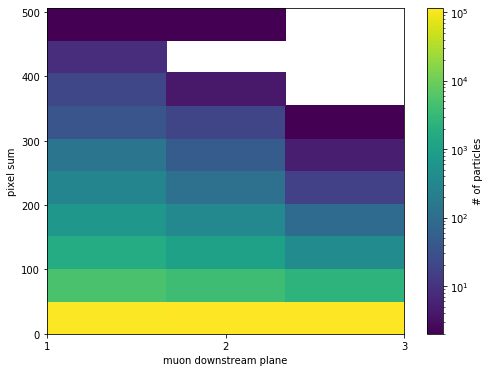

In [79]:
fig, ax = plt.subplots(figsize=(8,6))

planes_arr = np.zeros((full_X.shape[0], mu_down_planes_num))

for i in range(mu_down_planes_num):
    planes_arr[:,i] = i + 1

hist = ax.hist2d(planes_arr.flatten(), full_X[:,-mu_down_planes_num:].flatten(), 
                 norm=mpl.colors.LogNorm(), bins=(mu_down_planes_num, 10))

plt.xlabel('muon downstream plane')
plt.ylabel('pixel sum')
plt.xticks(np.arange(1,mu_down_planes_num + 1))

cbar = fig.colorbar(hist[3], ax=ax)
cbar.set_label('# of particles')
    
plt.show

In [ ]:
# might take a very long time to run

plane_arr = np.arange(1,6)

for i in range(30000):
    plt.plot(plane_arr, full_X[i], 'b', alpha=0.1)

plt.ylabel('energy')
plt.xlabel('plane')
plt.tight_layout()
plt.show()